# CS224W - Colab 0

Colab 0 可以帮助你熟悉图挖掘和图神经网络的基本概念。本次实验中将介绍两个库，[NetworkX](https://networkx.org/documentation/stable/) 和 [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/).

你可以对实验中 PyTorch Geometric 部分不熟。图神经网络的概念和实现将在后续课程和实验中介绍。

## NetworkX 教程

`NetworkX` 是 `python` 中构建、操纵以及挖掘图时最常用的库。本部分教程主要使用来自[官方教程](https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6)的内容。

### 配置

In [50]:
# Import the NetworkX package
import networkx as nx

### 图

NetworkX 提供了用于存储各种图的类，比如有向图、无向图等。同时也提供了能够创建多重图的类。更多信息请参考[NetworkX 图类型](https://networkx.org/documentation/stable/reference/classes/index.html)。

In [51]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


### 结点

结点（带属性）可以很轻松地加入到 NetworkX 的图中。

In [52]:
# Add one node with node level attributes
G.add_node(0, feature=0, label=0)

# Get attributes of the node 0
print(f"Node 0 has the attributes {G.nodes[0]}")

Node 0 has the attributes {'feature': 0, 'label': 0}


In [53]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
])

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
print(f"G has {G.number_of_nodes()} nodes")

(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


### 边

与结点类似，边（带属性）也可以很轻松地加入到 NetworkX 图中。

In [54]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
print(f"Edge (0, 1) has the attributes {G.edges[(0, 1)]}")

Edge (0, 1) has the attributes {'weight': 0.5}


In [55]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
print(f"G has {G.number_of_edges()} edges")

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


### 可视化

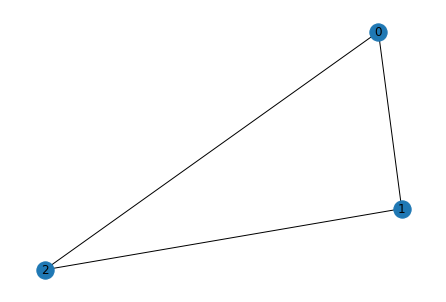

In [56]:
# Draw the graph
nx.draw(G, with_labels = True)

### 结点的度和邻居

In [57]:
node_id = 1

# Degree of node 1
print(f"Node {node_id} has degree {G.degree[node_id]}")

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print(f"Node {node_id} has neighbor {neighbor}")

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


### 其他功能

NetworkX 也提供了很多其他用来学习图的方法。

这里是结点 [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank) 的示例（PageRank 原理可以参考 Lecture 内容）。

{0: 0.17857162031103999, 1: 0.32142837968896, 2: 0.32142837968896, 3: 0.17857162031103999}


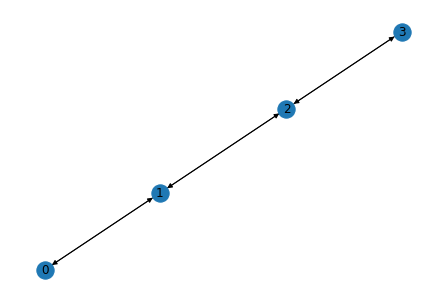

In [58]:
num_nodes = 4
# Create a new path like graph and change it to a directed graph
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
print(pr)

### 文档

你可以查阅 [NetworkX的文档](https://networkx.org/documentation/stable/) 以获取更全面的了解。

## PyTorch Geometric 教程

PyTorch Geometric (PyG) 是PyTorch库的拓展。它提供了用来构建图深度学习模型的基础模块，包括各种图神经网络层和大量的测试数据集。

如果还不理解 `GCNConv` 的话请不用担心 —— 后续的 lecture 会涵盖这部分内容。

本教程主要采用了来自[Matthias Fey](https://rusty1s.github.io/#/)的[教程](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=ci-LpZWhRJoI)。

In [59]:
import torch
print(f"PyTorch has version {torch.__version__}")

PyTorch has version 1.11.0


### 配置

请按照[官方指示](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html)，安装`PyG`库。

### 可视化

In [60]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

### 介绍

最近几年，图深度学习逐渐成为深度学习社区中最火热的研究领域之一。图神经网络GNN旨在将经典深度学习概念推广到不规则结构的数据上（相较于图片或文本），并让神经网络能够对结果进行解释。

本教程会通过基于[`PyG`](https://github.com/rusty1s/pytorch_geometric)库的模型，给你引入一些关于图深度学习的基本概念。

跟随[Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)，让我们深入GNN的世界看一下简单的图结构样例，即著名的[Zachary's karate club network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)。这个图是一个社交网络，共有空手道成员34名，并记录了这些人中哪两个人之间在空手道俱乐部之外相互互动。此处，我们想要根据成员间互动检测生成的小团体。

### Datasets 对象

`PyG`提供了访问数据集的简单方法，即用[`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets)的子模块。在初始化[`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub)数据集后，我们可以先看看他的一些属性。

比如，我们可以看到这个数据集只有**一张图**，并且数据集中的每个结点都被分配了**34维特征向量**，可以唯一地描述空手道俱乐部中地成员。

除此之外，图中还有4个分类，代表了成员所属的小团体。

In [61]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


### Data 对象

PyTorch Geometric 中的每张图都由一个[`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data)对象表示，该对象包含了用于描述这张图所有信息。我们可以打印该对象`print(data)`以获得这张图的概述。

``` python
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```

可以看到，`Data`对象有4个属性：

1. `edge_index`属性有关于**图连通性**的所有信息，即每条边的源节点和终结点。
2. `x`是**结点特征**，该例中每个结点都有一个34维的特征向量。
3. `y`是**结点的标签**，该例中为结点所属的类。
4. `train_mask`描述了我们已知分类的结点，该例中每个团体只有一个，共4个结点。（即我们知道了34个结点中的4个结点属于哪个团体。）

`Data`对象还提供了一些**工具函数**来计算图的一些基础属性。比如，我们可以很轻松的推测出图中是否存在孤立结点，图是否有自连边，亦或图是否有向等。

In [62]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


### Edge Index 对象

通过打印`edge_index`，我们可以更深入地理解`PyG`在内部是如何表示图的连通性的。可以看到对于每条边，`edge_index`都有一个包含两个结点序号的元组与之对应，其中第一个结点序号是源结点的索引，第二个是终结点的索引。这种表示称为**COO(coordinate format)格式**，通常用来表示稀疏矩阵。`PyG`选择使用**COO格式**，而没有选择用邻接矩阵形式的稠密表征。

在将`Data`对象转化为`networkx`库形式后，我们可以进行可视化。

In [63]:
edge_index = data.edge_index
print(edge_index.t())

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

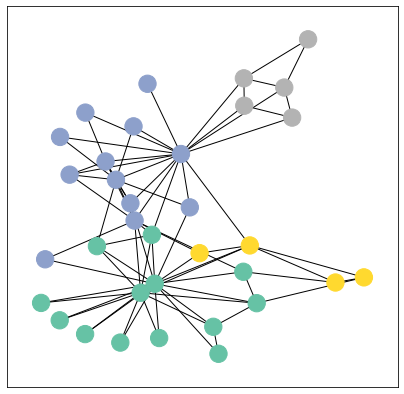

In [64]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

### 实现图神经网络

在学习了`PyG`的数据操作之后，是时候搭建我们第一个图神经网络了！

我们将使用最简单的GNN算子，即**GCN层** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907))。

`PyG`通过[`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv)实现了**GCN层**，可以通过传入结点表征`x`以及COO形式的图连通性表征`edge_index`。

有了`GCNConv`，我们就可以通过在一个`torch.nn.Module`类中定义网络结构，以创建第一个图神经网络。

In [65]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


此处我们在`__init__`方法中初始化了我们所有的层，并且在`forward`中定义了我们网络的计算流。

首先定义并堆叠了三层`GCNConv`，即可以聚集每个结点3跳领域内的信息。除此之外，`GCNConv`层还将结点特征维度降到了2，且每个`GCNConv`层都由[`tanh`](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh)激活。

然后，我们施加了一个线性变换，用来将结点映射到4个社区中的1个。

最终返回分类器的分类结果和最后一层`GCNConv`之后的结点表征。

接下来我们通过`GCN()`来实例化模型，然后打印模型来输出该模型所使用子模块的概述。

Embedding shape: [34, 2]


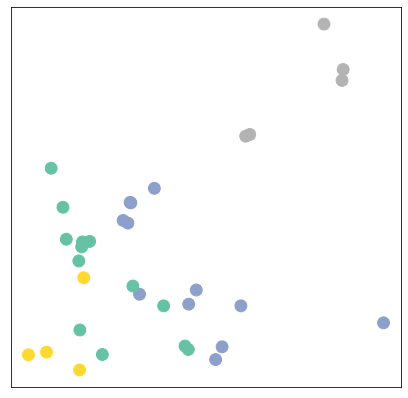

In [66]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

看起来相当好，尽管模型的权重是完全随机初始化，且我们还没有进行任何训练，同种颜色的结点（同个团体）在嵌入空间中还是紧密地聚合在一起了。我们可以从中得出结论：GNN可以让图中相近结点的表征也变得相似。

### 在Karate Club数据集上训练网络

既然我们模型已经参数化且可微，我们可以加一些标签，训练模型并看看嵌入如何变化。此处我们将使用半监督学习或直推式学习的方法：允许使用输入的所有图数据，但是只用给出的标签。

训练我们的模型和训练其他PyTorch模型类似。除了定义网络结构外，我们还要定义一个损失函数（此处使用[`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)）并初始化一个优化器（此处使用[`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)）。

然后，我们进行了多轮前播反播优化。

如果你熟悉PyTorch，你应该很熟悉这个过程。如果不熟悉，PyTorch文档可以给你介绍[如何用PyTorch训练一个神经网络](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer)。

注意，我们的半监督学习是通过下面这行代码实现的：

```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```

即我们虽然计算了所有结点的嵌入，但是只使用训练结点（数据集中标注的结点）来计算损失。这里是通过用`train_mask`来过滤分类结果`out`以及ground-truth`data.y`来实现的。

让我们开始训练来看看节点嵌入如何随着训练演变。

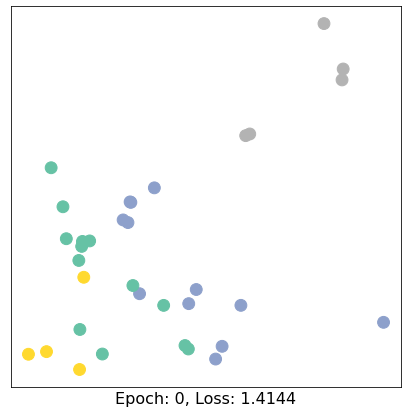

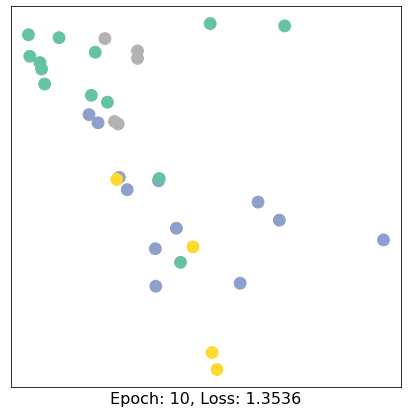

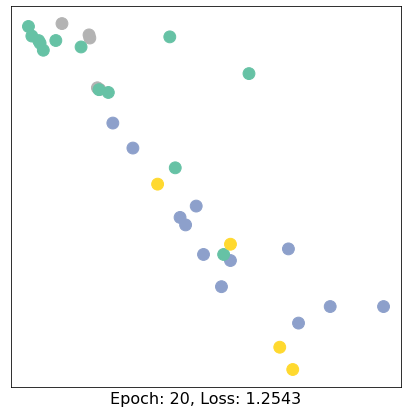

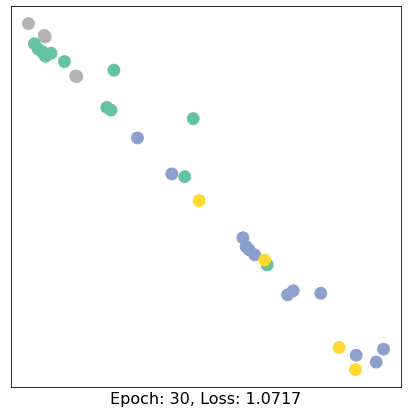

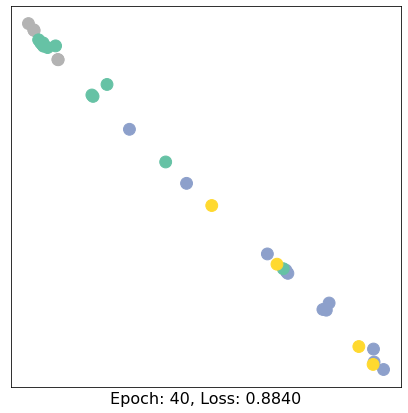

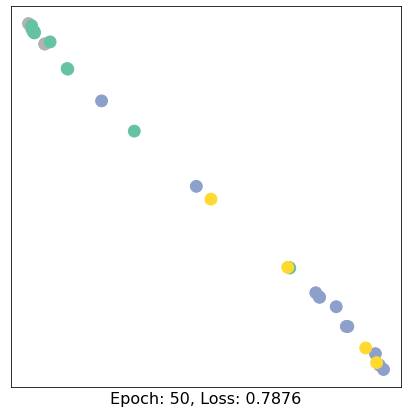

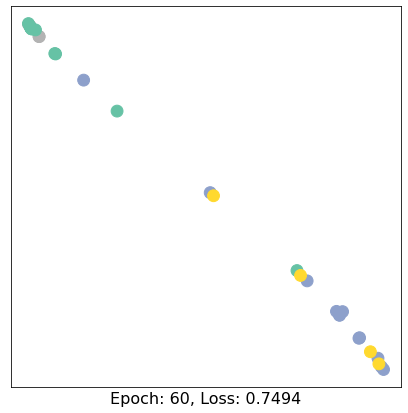

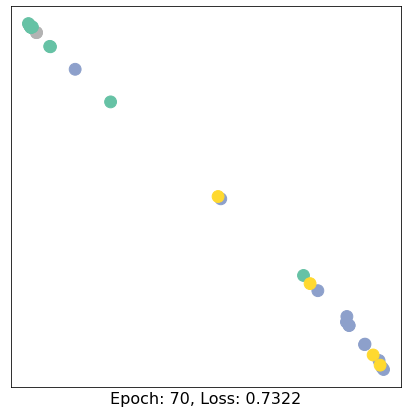

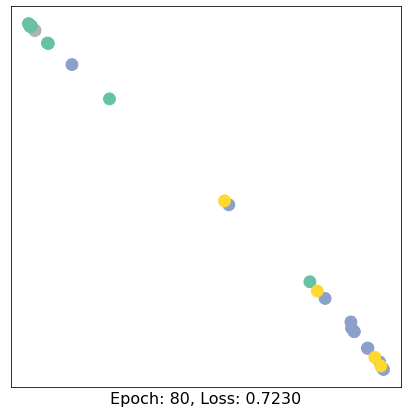

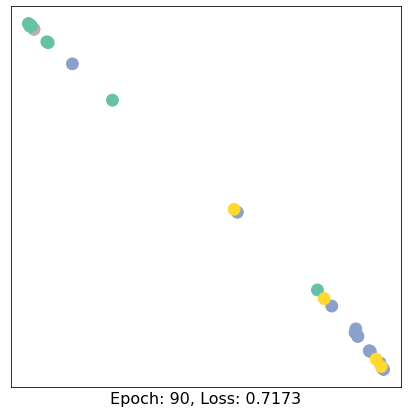

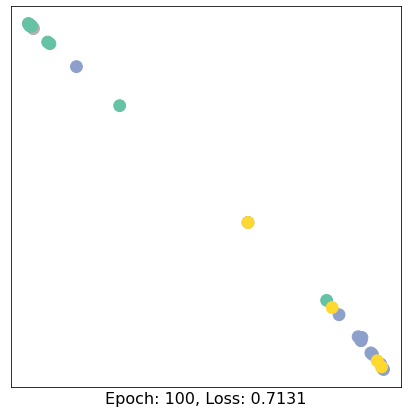

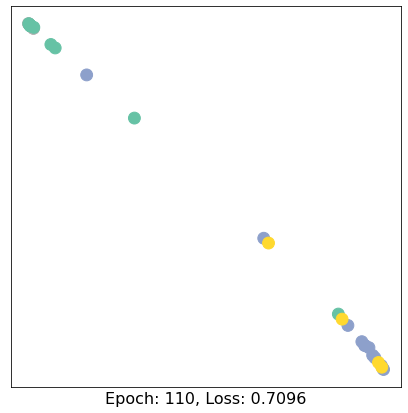

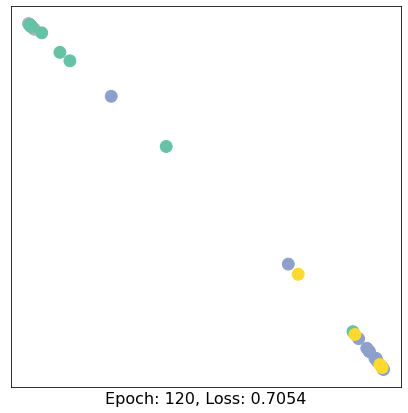

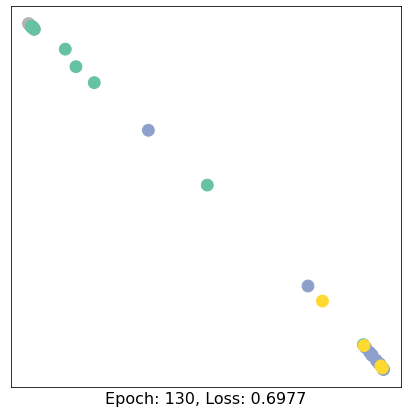

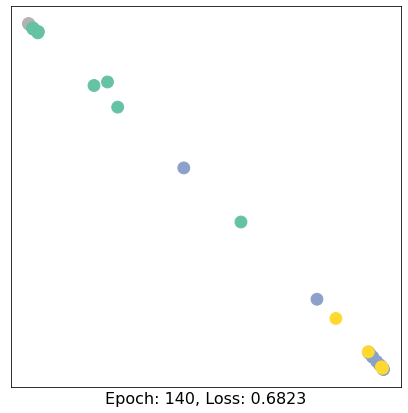

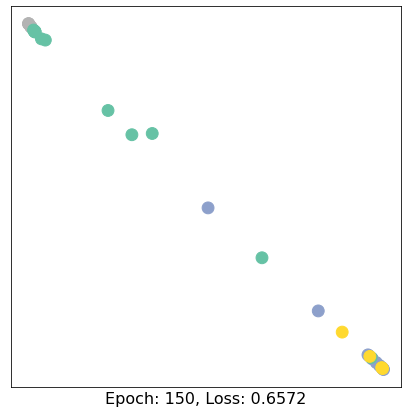

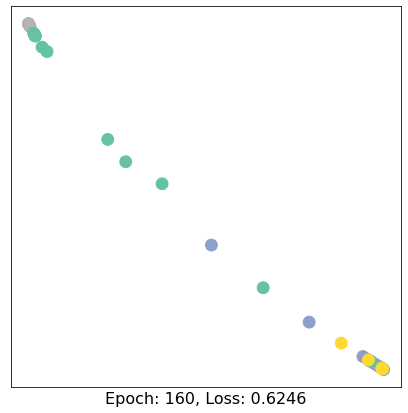

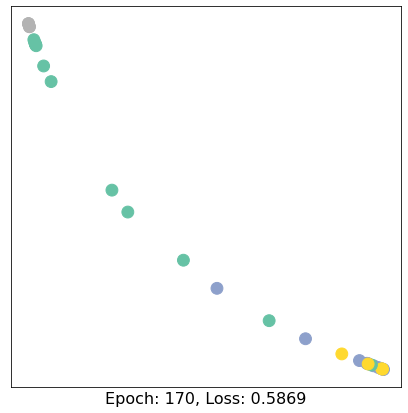

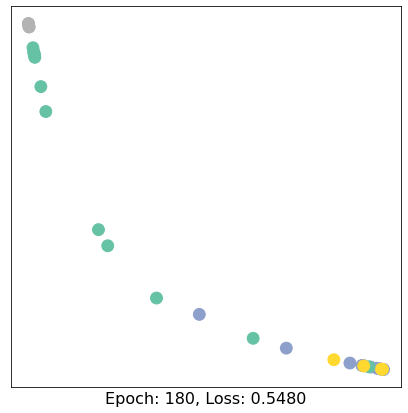

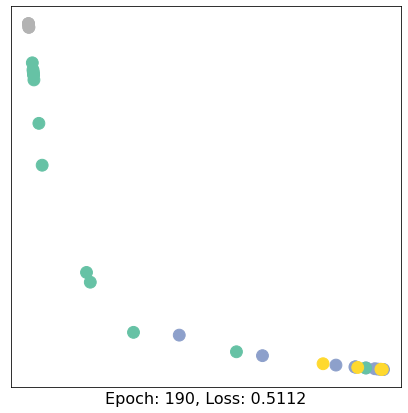

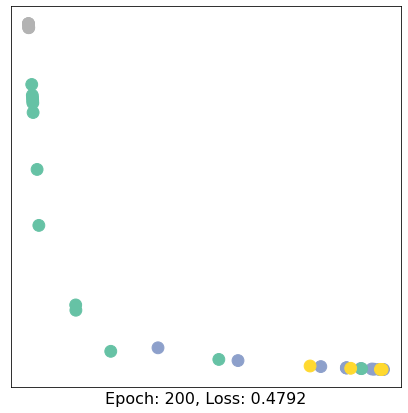

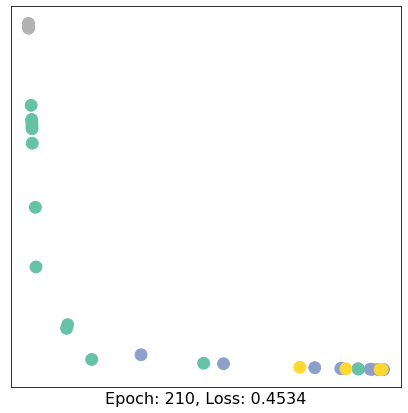

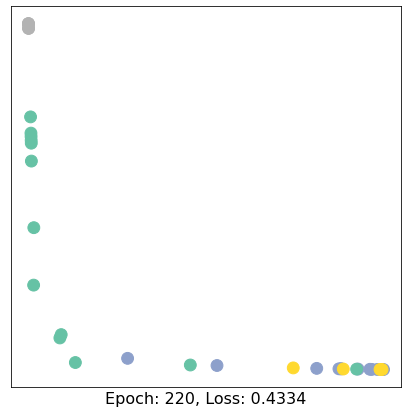

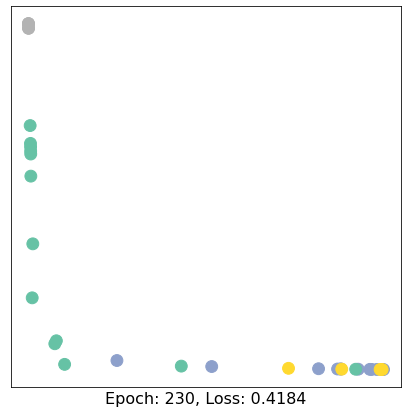

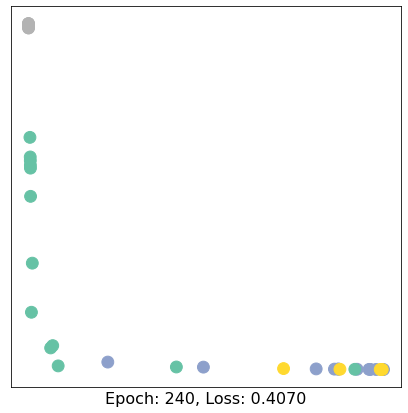

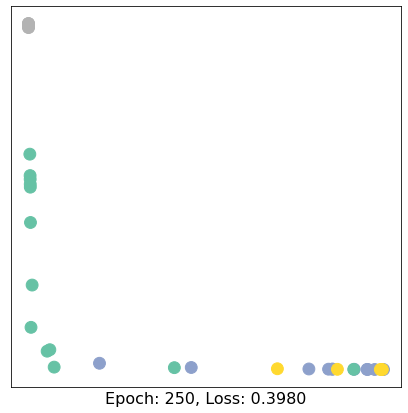

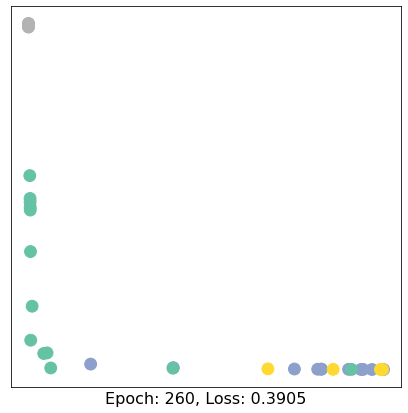

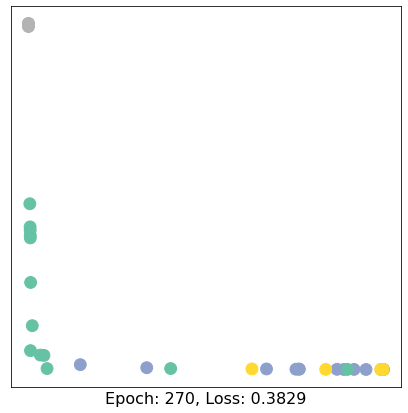

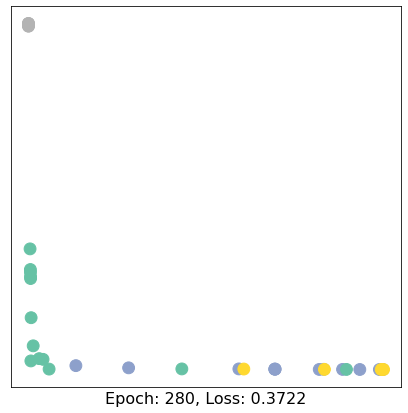

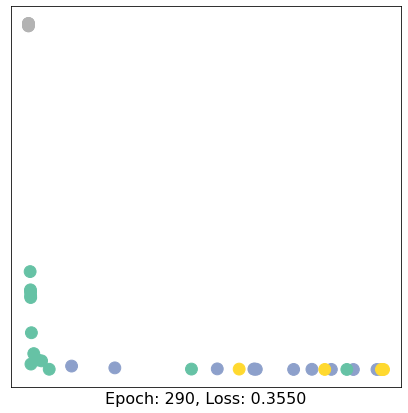

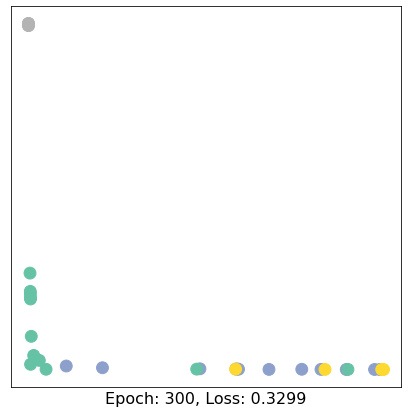

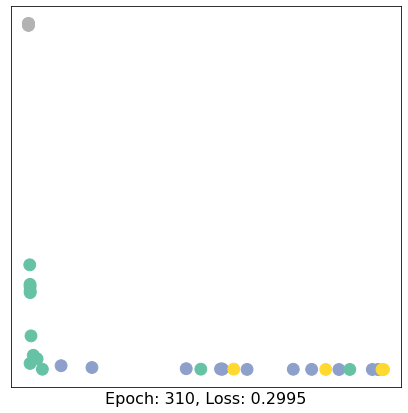

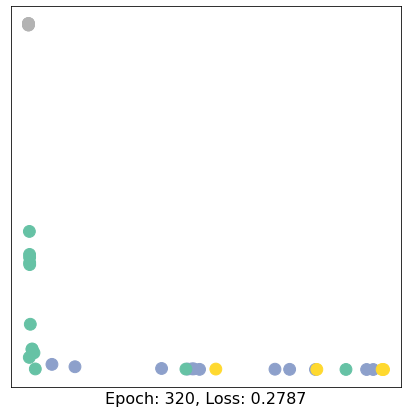

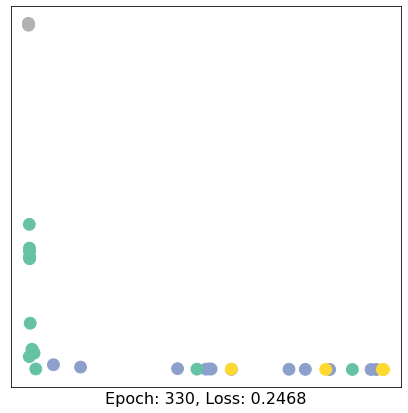

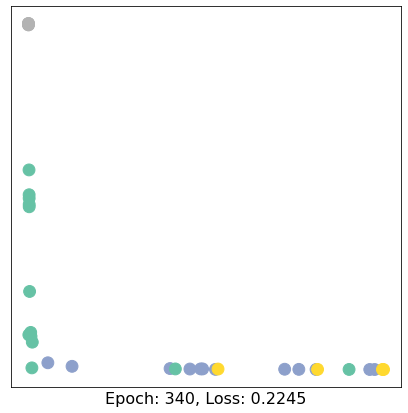

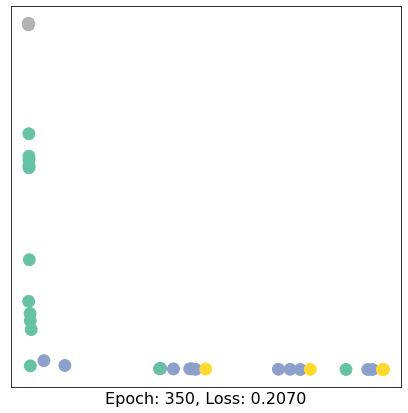

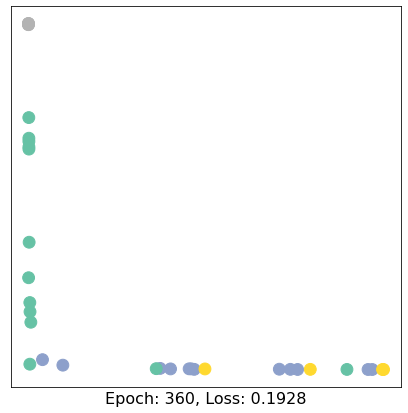

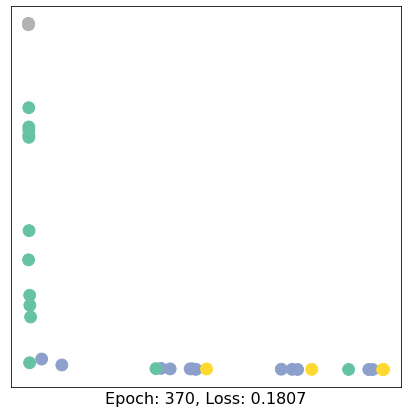

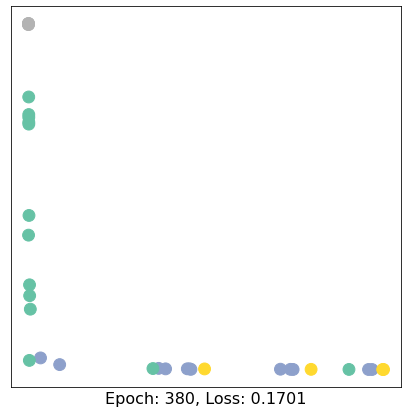

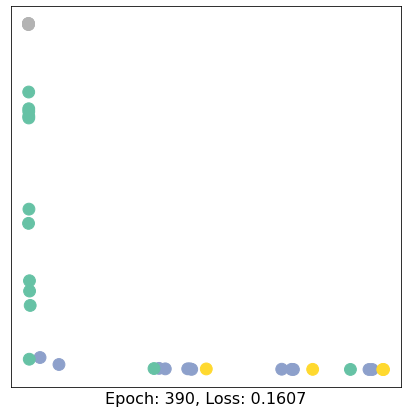

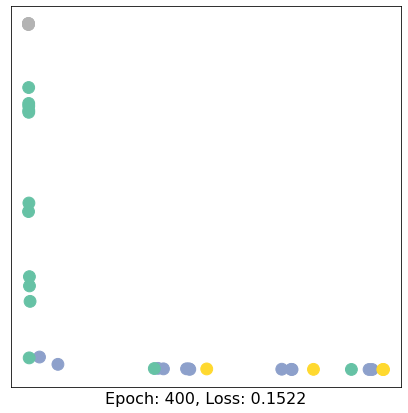

In [67]:
import time

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

如你所见，3层GCN模型可以将结点线性分类，且大部分结点都分类正确。

除此之外，我们只用了几行代码就实现以上，感谢PyTorch Geometric库帮我们处理数据以及实现GNN。

### 文档

你可以阅读[PyG文档](https://pytorch-geometric.readthedocs.io/en/latest/)来了解更多。